# Allstate Corporation

### First, check configuration:

In [1]:
#!/bin/bash
!echo "Configuration environment:\n"
!python --version >> config-environment.txt
!which python >> config-environment.txt
!pip --version >> config-environment.txt
!conda --version >> config-environment.txt
!which conda >> config-environment.txt

!cat config-environment.txt

# Libraries
!~/anaconda3/bin/pip freeze > requeriments.txt

Configuration environment:

Python 3.7.0
/home/campos/anaconda3/bin/python
pip 18.1 from /home/campos/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
conda 4.5.12
/home/campos/anaconda3/bin/conda


In [2]:
!rm config-environment.txt
# SUPERVISED LEARNING

# import
# load
# analyse
# (features)X AND (labels)Y
# split train and test
# choose model: classifier or regressor
# trainning model with data train
# predict
# calculate accuracy (accuracy_score)
# plot

### Imports

In [3]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import mean_absolute_error

# Other
from sklearn.preprocessing import LabelEncoder
import gc # clear RAM
import warnings

/home/campos/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Format cell

In [4]:
# guarantees visualization inside the jupyter
%matplotlib inline 

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

## Load dataset

In [5]:
# load data in dataset
df_train = pd.read_csv("./data_base/train.csv", encoding='utf-8')
df_test = pd.read_csv("./data_base/test.csv", encoding='utf-8')

## Data analysis 

#### Conjuntos de dados e entradas
O conjunto de dados contém 2 arquivos .csv com informações necessárias para fazer uma previsão.
Eles são:<br/>
1. Variáveis em train.csv e test.csv: 
 - **id:** o id de um par de perguntas do conjunto de treinamento 
 - **cat1 até cat116:** variáveis de categoria (o intervalo de valores não é fornecido, nem os nomes das colunas). 
 - **cont1 até cont14:** variáveis contínuas (o intervalo de valores não é fornecido, nem os nomes das colunas).
 - **loss:** o valor que a empresa tem que pagar por uma determinada reivindicação. Esta é a variável de destino. 
 
 
 OBS: Em test.csv, a perda não está presente, já que vamos prever isso.

In [6]:
# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
# Size and types of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [8]:
# describing statistics of categorical variables
df_train.describe(include = ['object'])

cat1    cat2    cat3    cat4    cat5    cat6    cat7    cat8  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    141550  106721  177993  128395  123737  131693  183744  177274   

          cat9   cat10   cat11   cat12   cat13   cat14   cat15   cat16  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    113122  160213  168186  159825  168851  186041  188284  181843   

         cat17   cat18   cat19   cat20   cat21   cat22   cat23   cat24  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    187009  187331  186510  188114  187905  188275  157445  181977   

         cat25   cat26   cat27   cat28   cat29   cat30   cat31   cat32  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    169969  177119  168250  180938  184593  184760  182980  187107   

         cat33   cat34   cat35   cat36   cat37   cat38   cat39   cat40  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    187361  187734  188105  156313  165729  169323  183393  180119   

         cat41   cat42   cat43   cat44   cat45   cat46   cat47   cat48  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    181177  186623  184110  172716  183991  187436  187617  188049   

         cat49   cat50   cat51   cat52   cat53   cat54   cat55   cat56  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    179127  137611  187071  179505  172949  183762  188173  188136   

         cat57   cat58   cat59   cat60   cat61   cat62   cat63   cat64  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    185296  188079  188018  187872  187596  188273  188239  188271   

         cat65   cat66   cat67   cat68   cat69   cat70   cat71   cat72  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    186056  179982  187626  188176  188011  188295  178646  118322   

         cat73   cat74   cat75   cat76   cat77   cat78   cat79   cat80  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       3       3       3       3       4       4       4       4   
top          A       A       A       A       D       B       B       D   
freq    154275  184731  154307  181347  187503  186526  152929  137505   

         cat81   cat82   cat83   cat84   cat85   cat86   cat87   cat88  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       4       4       4       4       4       4       4       4   
top          D       B       B       C       B       B       B       A   
freq

In [9]:
# Size and types of the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [10]:
# describing statistics of categorical variables
df_test.describe(include = ['object'])

cat1    cat2    cat3    cat4    cat5    cat6    cat7    cat8  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq     94096   71203  118752   86026   82282   88014  122546  118112   

          cat9   cat10   cat11   cat12   cat13   cat14   cat15   cat16  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq     75509  106944  112470  106777  112604  123954  125523  121262   

         cat17   cat18   cat19   cat20   cat21   cat22   cat23   cat24  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    124666  124902  124376  125434  125291  125519  105272  121430   

         cat25   cat26   cat27   cat28   cat29   cat30   cat31   cat32  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    113405  118077  112239  120751  123093  123247  122061  124723   

         cat33   cat34   cat35   cat36   cat37   cat38   cat39   cat40  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    124914  125184  125417  104035  110512  112774  122170  120081   

         cat41   cat42   cat43   cat44   cat45   cat46   cat47   cat48  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    120840  124343  122811  114985  122647  124972  125055  125366   

         cat49   cat50   cat51   cat52   cat53   cat54   cat55   cat56  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    119495   91888  124761  119761  115388  122577  125449  125435   

         cat57   cat58   cat59   cat60   cat61   cat62   cat63   cat64  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    123560  125393  125340  125289  125024  125525  125501  125524   

         cat65   cat66   cat67   cat68   cat69   cat70   cat71   cat72  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    124021  119930  125112  125437  125351  125526  119187   79486   

         cat73   cat74   cat75   cat76   cat77   cat78   cat79   cat80  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       3       3       3       3       4       4       4       4   
top          A       A       A       A       D       B       B       D   
freq    102595  123055  102828  120866  124976  124325  102007   91839   

         cat81   cat82   cat83   cat84   cat85   cat86   cat87   cat88  \
count   125546  125546  125546  125546  125546  125546  125546  125546   
unique       4       4       4       4       4       4       4       4   
top          D       B       B       C       B       B       B       A   
freq

In [11]:
df_train.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     B     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat38 cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat62 cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     B   
4     A     A     A     A     A     A     A     A     A     A     B     A   

  cat74 cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85  \
0     A     B     A     D     B     B     D     D     B     D     C     B   
1     A     A     A     D     B     B     D     D     A     B     C     B   
2     A     A     A     D     B     B     B     D     B     D     C     B   
3     A     A     A     D     B     B     D     D     D     B     C     B   
4     A     A     A     D     B     D     B     D     B     B     C     B   

  cat86 cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97  \
0     D     B     A     A     A     A     A     D     B     C     E     A   
1     D     B     A     A     A     A     A     D     D     C     E     E   
2     B     B     A     A     A     A     A     D     D     C     E     E   
3     D     B     A     A     A     A     A     D     D     C     E     E   
4     B     C     A     A     A     B     H     D     B     D     E     E   

  cat98 cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0     C     T      B      G      A      A      I      E      G      J      G   
1     D     T      L      F      A      A      E      E      I      K      K   
2     A     D      L      O      A      B      E     

In [12]:
df_test.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   4    A    B    A    A    A    A    A    A    B     A     B     A     A   
1   6    A    B    A    B    A    A    A    A    B     A     A     A     A   
2   9    A    B    A    B    B    A    B    A    B     B     A     B     B   
3  12    A    A    A    A    B    A    A    A    A     A     A     A     A   
4  15    B    A    A    A    A    B    A    A    A     A     A     A     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     B     B     A   
2     B     A     A     A     A     A     A     A     A     B     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     B     A   
3     A     A     A     A     A     A     A     A     A     A     B     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat38 cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     B     B     A     A     A     A     A     A     A     A     A     A   
3     B     A     A     B     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     B     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     B     A     A     A     A     A     A     A     A     A     A     A   

  cat62 cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     B     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     B     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat74 cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85  \
0     A     A     A     D     B     B     D     D     B     B     C     B   
1     A     B     A     D     B     B     D     D     B     B     C     B   
2     A     A     B     D     B     B     B     B     B     D     C     B   
3     A     A     A     D     B     D     B     D     B     B     A     B   
4     A     A     A     D     B     B     D     D     B     B     C     B   

  cat86 cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97  \
0     D     B     A     A     A     A     A     D     C     C     E     C   
1     B     B     A     A     A     A     A     D     D     D     E     A   
2     B     B     A     B     A     A     A     D     D     C     E     E   
3     D     D     A     A     A     G     H     D     D     C     E     E   
4     B     B     A     A     A     A     A     D     B     D     E     A   

  cat98 cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0     D     T      H      G      A      A      G      E      I      L      K   
1     A     P      B      D      A      A      G      G      G      F      B   
2     A     D      G      Q      A      D      D     

In [13]:
# Types data in collumns
print(df_train.dtypes)

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat40      object
cat41      object
cat42      object
cat43      object
cat44      object
cat45      object
cat46      object
cat47      object
cat48      object
cat49      object
cat50      object
cat51      object
cat52      object
cat53      object
cat54      object
cat55     

In [14]:
# Types data in collumns
print(df_test.dtypes)

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat40      object
cat41      object
cat42      object
cat43      object
cat44      object
cat45      object
cat46      object
cat47      object
cat48      object
cat49      object
cat50      object
cat51      object
cat52      object
cat53      object
cat54      object
cat55     

## Data Cleanning

- Check missing values
- Sepearte the categorical and continous features
- Transformations

In [15]:
# Check each columns by values missing
missing = df_train.isnull().any()

for i in missing:
    if i == True:
        print ("Column {} contains values missing !".format(i))

In [16]:
# Sepearte the categorical and continous features
cont_columns = []
cat_columns = []

for i in df_train.columns:
    if df_train[i].dtype == 'float':
        cont_columns.append(i)
    elif df_test[i].dtype == 'object':
        cat_columns.append(i)

print("Columns continuos: \n{} \n".format(cont_columns))
print("Columns categorical: \n{}\n".format(cat_columns))

Columns continuos: 
['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'] 

Columns categorical: 
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat9

In [17]:
# log transform
df_train['loss'] = np.log1p(df_train['loss'])

### Convert categorical string values to numeric values

There are 116 categories with non alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values. So, lets convert it into numeric values

In [19]:
for row in cat_columns:
    le = LabelEncoder()
    le.fit(df_train[row].unique())
    df_train[row] = le.transform(df_train[row])

df_train.head()

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11  \
0   1     0     1     0     1     0     0     0     0     1      0      1   
1   2     0     1     0     0     0     0     0     0     1      1      0   
2   5     0     1     0     0     1     0     0     0     1      1      1   
3  10     1     1     0     1     0     0     0     0     1      0      0   
4  11     0     1     0     1     0     0     0     0     1      1      0   

   cat12  cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      1      1      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      1      0      0      0      0      0      0      0      0      0   

   cat22  cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31  \
0      0      1      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      1      0      0      0      0      0      0      0      0   
4      0      1      0      0      0      0      0      0      0      0   

   cat32  cat33  cat34  cat35  cat36  cat37  cat38  cat39  cat40  cat41  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      1      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat42  cat43  cat44  cat45  cat46  cat47  cat48  cat49  cat50  cat51  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat52  cat53  cat54  cat55  cat56  cat57  cat58  cat59  cat60  cat61  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat62  cat63  cat64  cat65  cat66  cat67  cat68  cat69  cat70  cat71  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat72  cat73  cat74  cat75  cat76  cat77  cat78  cat79  cat80  cat81  \
0      0      0      0      1      0      3      1      1      3      3   
1      0      0      0      0      0      3      1      1      3      3   
2      0      0      0      0      0      3      1      1      1      3   
3      0      1      0      0      0      3      1      1      3      3   
4      1      0      0      0      0      3      1      3      1      3   

   cat82  cat83  cat84  cat85  cat86  cat87  cat88  cat89  cat90  cat91  \
0      1      3      2      1      3      1      0      0      0      0   
1      0      1      2      1      3      1      0      0      0      0   
2      1      3      2      1      1      1      0      0      0      0   
3      3      1      2      1      3      1      0      0      0      0   
4      1

In [61]:
# Há muitas variáveis categóricas, 
# por isso será reduzido para somente variáveis categoricas que apresentam níveis entre 2 até 10
filter_4_10 = list((df_train[cat_columns].apply(pd.Series.nunique) > 2) & 
                (df_train[cat_columns].apply(pd.Series.nunique) <= 10))

In [62]:
catFeatures_4_10_List = [i for (i, v) in zip(cat_columns, filter_4_10) if v]
        
print("Total features categorical = {}".format(len(catFeatures_4_10_List)))

Total features categorical = 27


## Feature enginer

- Continuous feature
 - Visualize data continuos
 - Correlation data continuos
 - Matrix correlation: continuous features
- Categorical feature
 - Transform categorical feature
 - Visualize data categorical
 - Matrix correlation: categorical features

### Continuos features

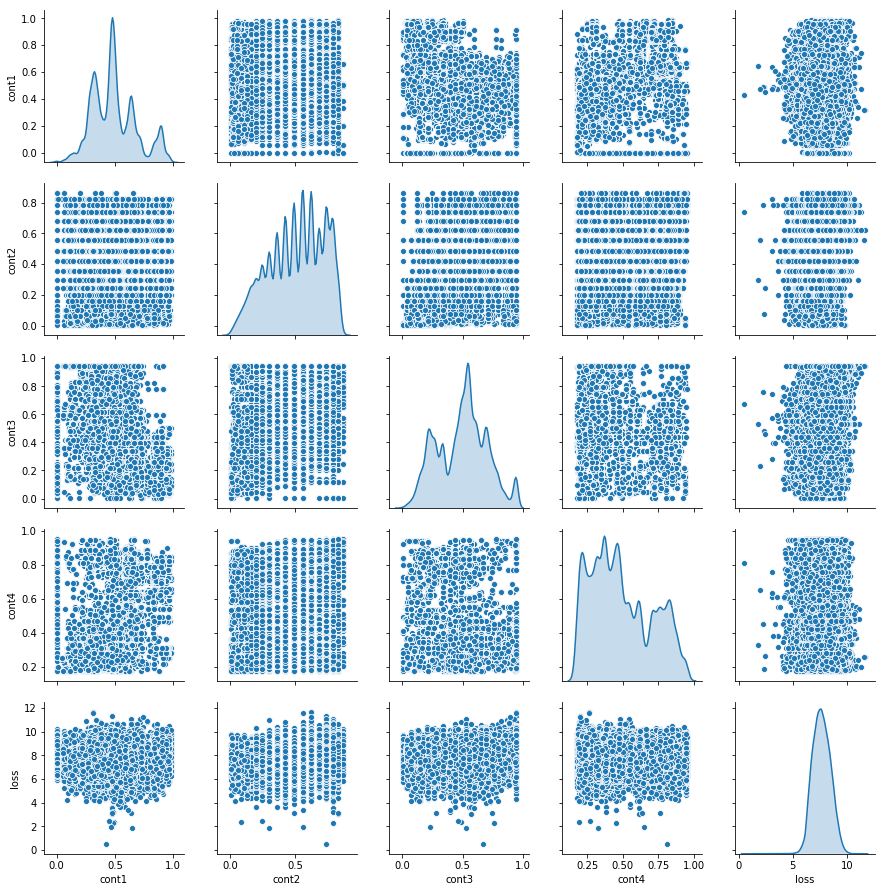

In [23]:
sns.pairplot(
    df_train[cont_columns],
    vars=['cont1','cont2','cont3','cont4','loss'],
    kind = 'scatter',
    diag_kind='kde')

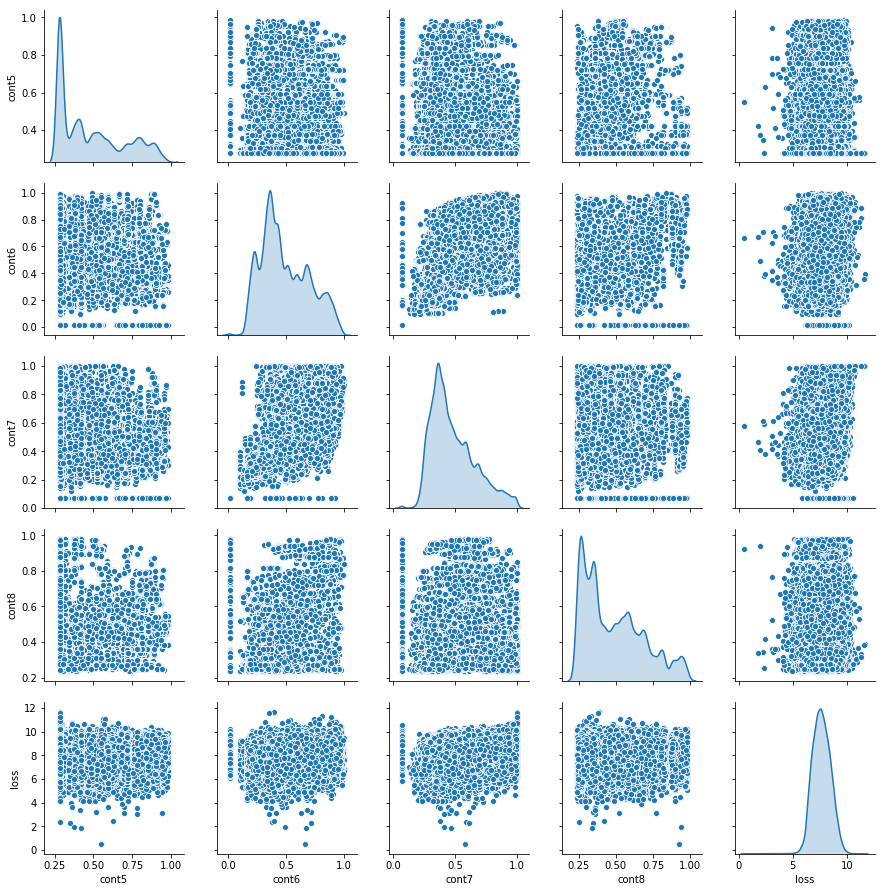

In [24]:
sns.pairplot(
    df_train[cont_columns],
    vars=['cont5','cont6','cont7','cont8','loss'],
    kind = 'scatter',
    diag_kind='kde')

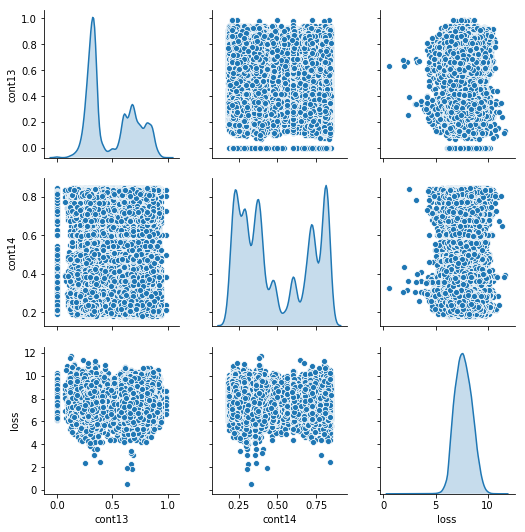

In [25]:
sns.pairplot(
    df_train[cont_columns],
    vars=['cont13','cont14','loss'],
    kind = 'scatter',
    diag_kind='kde')

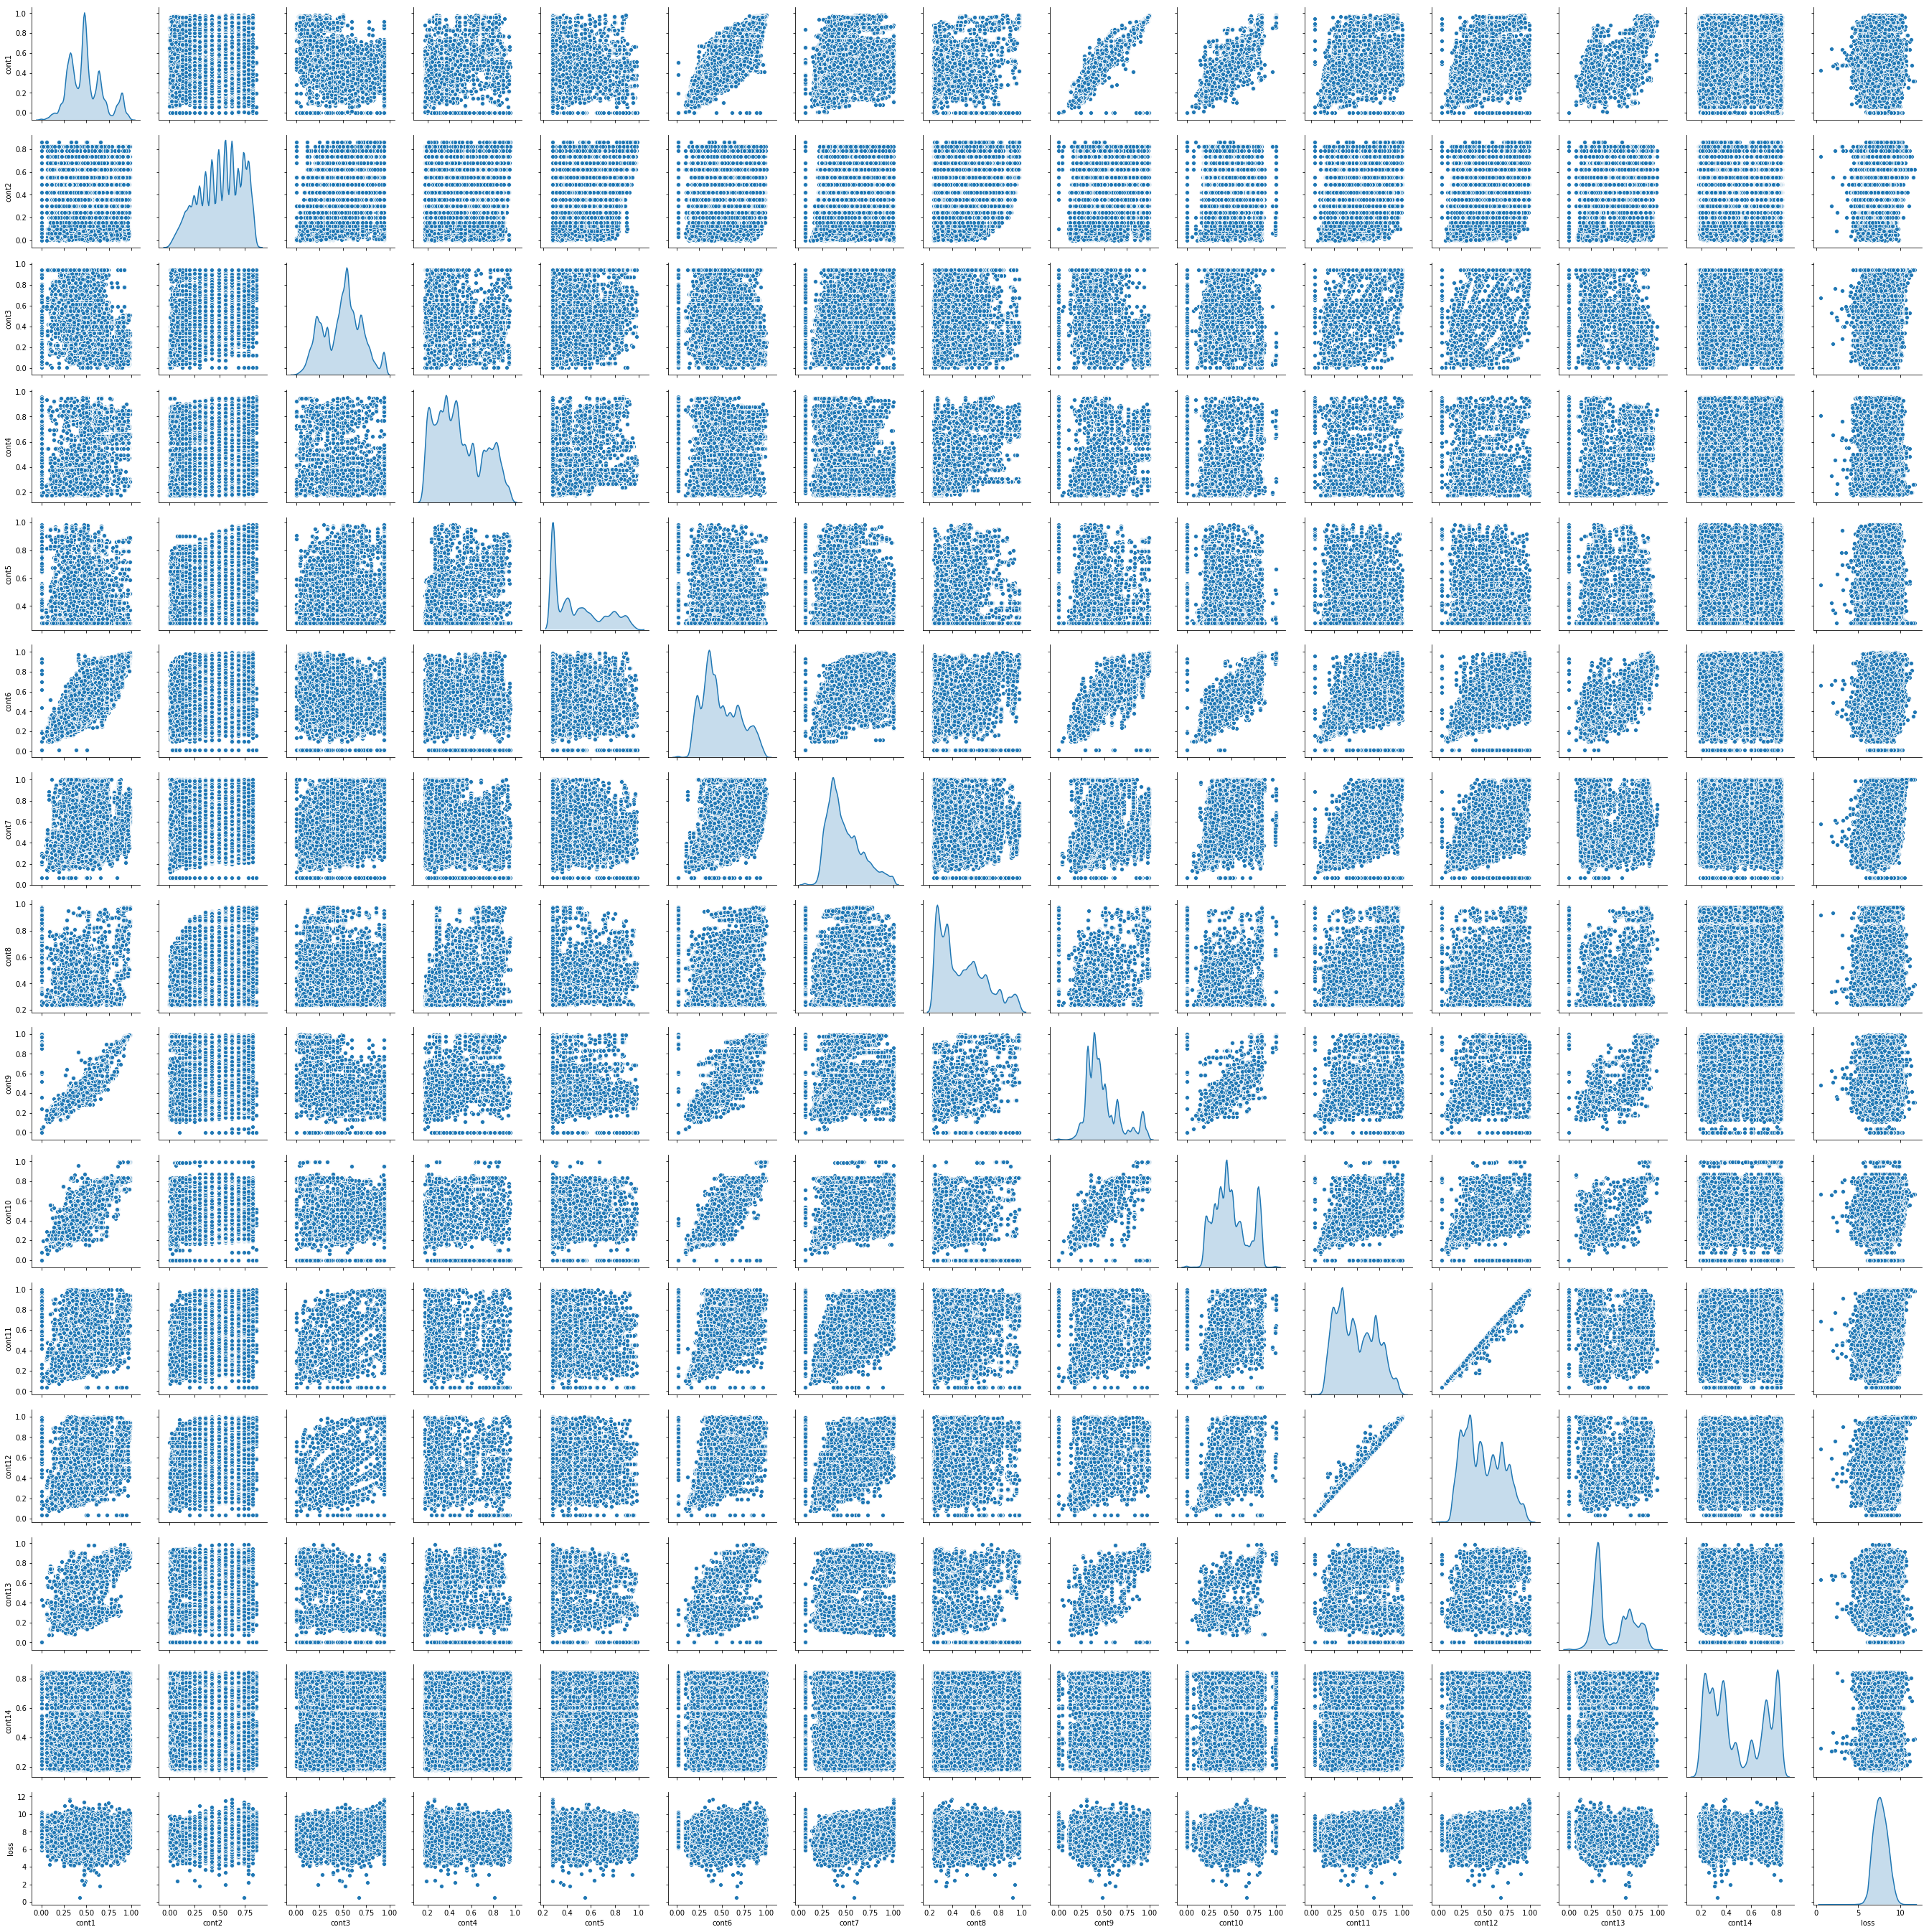

In [26]:
sns.pairplot(
    df_train[cont_columns],
    kind = 'scatter',
    diag_kind='kde')

### Matrix correlation: continuous features

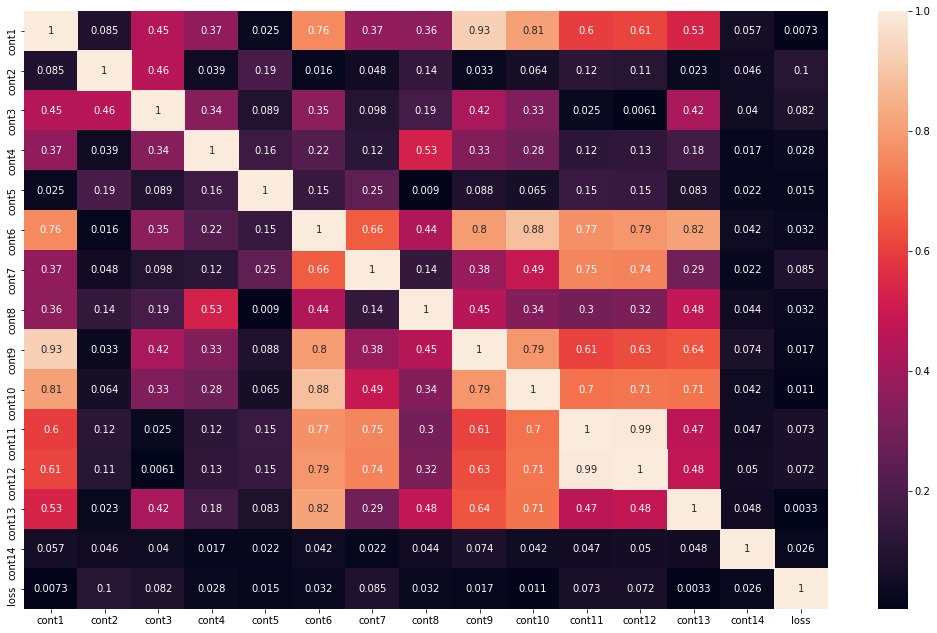

In [27]:
correlationMatrix = df_train[cont_columns].corr().abs()

plt.subplots(figsize=(18, 11))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False, linecolor='white')
plt.show()

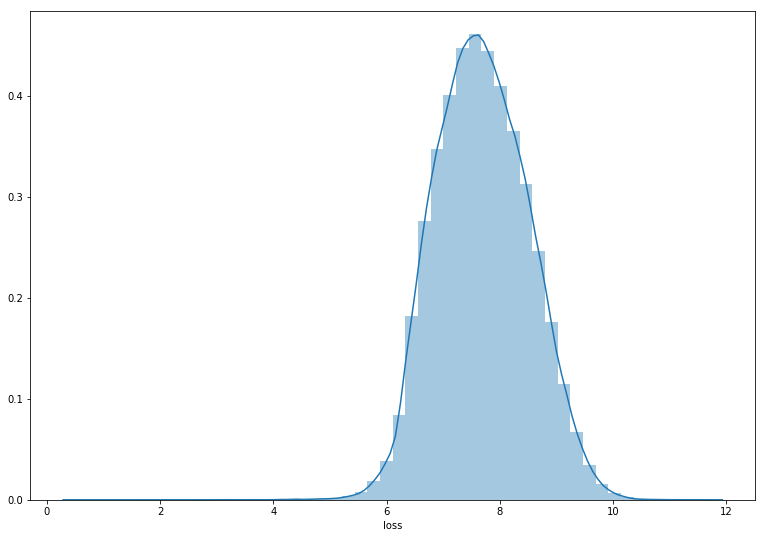

In [28]:
plt.figure(figsize=(13,9))
sns.distplot(df_train["loss"])

### Categorical features

In [31]:
cat_columns.append("loss")

### Matrix correlation: categorical features

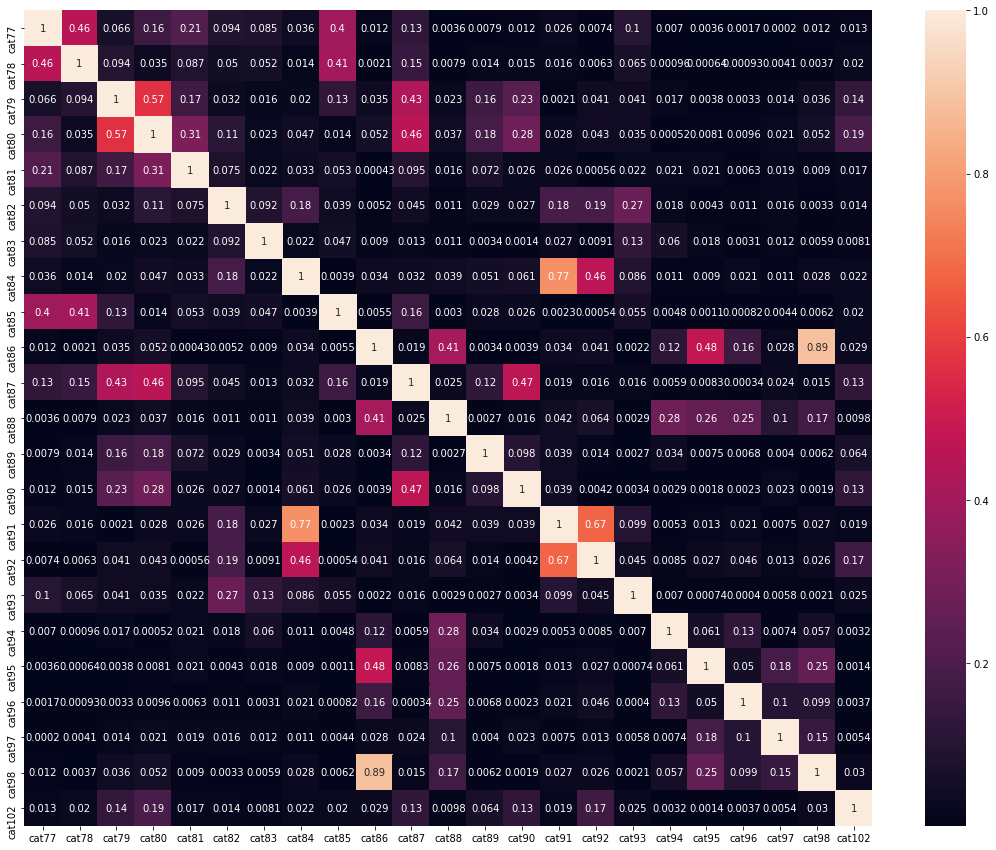

In [33]:
correlationMatrix = df_train[catFeatures_4_10_List].corr().abs()

plt.subplots(figsize=(19, 15))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False, linecolor='white')
plt.show()

### Best correlation in categorical feature

In [65]:
corrCatMatrix = df_train[catFeatures_4_10_List].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.sort_values(kind="quicksort",ascending=False)


print("Top correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:10])

Top correlated categorical feature pairs: 

cat86  cat98    0.886774
cat98  cat86    0.886774
cat91  cat84    0.773455
cat84  cat91    0.773455
cat92  cat91    0.674429
cat91  cat92    0.674429
cat80  cat79    0.567659
cat79  cat80    0.567659
cat77  cat76    0.507849
cat76  cat77    0.507849
dtype: float64


---

In [ ]:
# Split into train and validation

#get the number of rows and columns
r, c = df_train.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = df_train[:,0:(c-1)]
Y = df_train[:,(c-1)]
del df_train

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

Os modelos testados serão: regressão linear, XGBoost e Random Forest (Bagging). Para ajustar os
parâmetros no XGBoost, usaremos Grid Search.


duas métricas, a acurácia e precisão do
modelo.

regressão linear

XGBoost

Random Forest

comparar estes 3 modelos será analisado qual tem o menor erro absoluto médio